In [32]:
import numpy as np
from scipy.integrate import odeint

class CarPend:
    def __init__(self):
        self.M = 400/1000
        self.m = 50/1000
        self.action_set = np.array([-1,-0.5,0,0.5,1])
        self.dt = 0.01
        
        self.L = 0.3
        
        self.x = 0
        self.xp = 0
        self.xpp = 0
        
        self.theta = 0
        self.thetap = 0
        self.thetapp = 0
        
    def reset(self):
        self.x = 0
        self.xp = 0
        
        self.theta = np.random.uniform(-np.pi/100., np.pi/100.)
        self.thetap = np.random.uniform(-0.1,0.1)
        
    def dynamic_mod(self,x0,t,f):
        x1,x2,x3,x4 = x0
        tol = 10**(-6)
        er = 1
        g = 9.81
        b = 0.01
        
        dx2dt_old = self.xpp
        dx4dt_old = self.thetapp
        
        while er>tol:
            if abs(x1)>=5:
                dx2dt = 0
            else:
                dx2dt = f - dx4dt_old * self.m * self.L * np.cos(x3) + self.m * self.L * (x4**2) * np.sin(x3) / (self.M + self.m)
            
            dx4dt = (self.m * g * self.L * np.sin(x3) - self.m * self.L * np.cos(x3) * dx2dt - b*x4) / (self.m * self.L**2)
            
            er = max(abs(dx2dt - dx2dt_old),abs(dx4dt - dx4dt_old))
            
            dx2dt_old = dx2dt
            dx4dt_old = dx4dt
        
        self.xpp = dx2dt
        self.thetapp = dx4dt
            
        return [x2,dx2dt,x4,dx4dt]
    
    def step(self,action_index):
    
        x0 = np.array([self.x,self.xp,self.theta,self.thetap])
        f = self.action_set[action_index]
        
        sol = odeint(self.dynamic_mod,x0,[0,self.dt],args=(f,))
        
        self.x = sol[-1,0]
        self.x = max(self.x,-5)
        self.x = min(self.x, 5)
        
        if abs(self.x)>=5:
            self.xp = 0
        else:
            self.xp = sol[-1,1]
        
        self.theta = sol[-1,2]
        self.thetap = sol[-1,3]
        
        state = [self.x,self.xp,self.theta,self.thetap]
        
        if abs(self.x)<=2.5 and abs(self.theta)<=15*np.pi/180:
            done = False
            reward = 1
        else:
            done = True
            reward = 0
            
        return state, reward, done

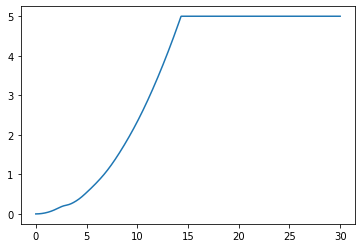

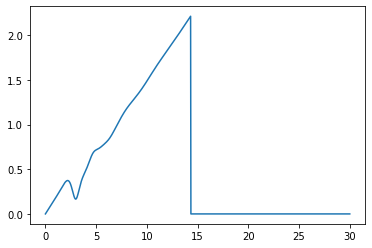

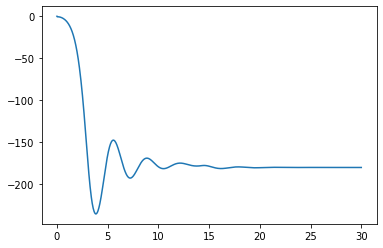

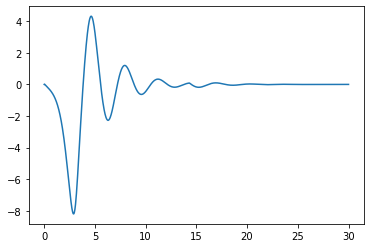

In [33]:
import matplotlib.pyplot as plt

tf = 30;
N = int(10/0.01) + 1

t = np.linspace(0,tf,N)

x = np.zeros(N)
xp = np.zeros(N)
xpp = np.zeros(N)
theta = np.zeros(N)
thetap = np.zeros(N)

Car = CarPend()
Car.reset()

for i in range(0,N-1):
    
    state = Car.step(3)
    
    x[i+1] = state[0]
    xp[i+1] = state[1]
    xpp[i] = Car.xpp
    theta[i+1] = state[2]
    thetap[i+1] = state[3]
    

plt.figure()
plt.plot(t,x)

plt.figure()
plt.plot(t,xp)

plt.figure()
plt.plot(t,theta*180/np.pi)

plt.figure()
plt.plot(t,thetap)

#plt.figure()
#plt.plot(t,xpp)

plt.show()